In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

In [2]:
des = pd.read_excel('glass.xlsx', sheet_name='Description')
des

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [3]:
df = pd.read_excel('glass.xlsx', sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


# 1. Exploratory Data Analysis (EDA):

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [5]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1.0


In [7]:
df.drop(39, inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
df1 = df.copy()

In [9]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7.0
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7.0
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7.0
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7.0


In [10]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 2. Data Visualization:

RI Skewness: 1.6480173737729908
RI Kurtosis : 5.038907169702992


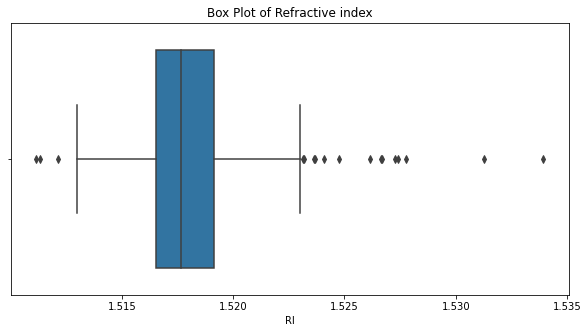

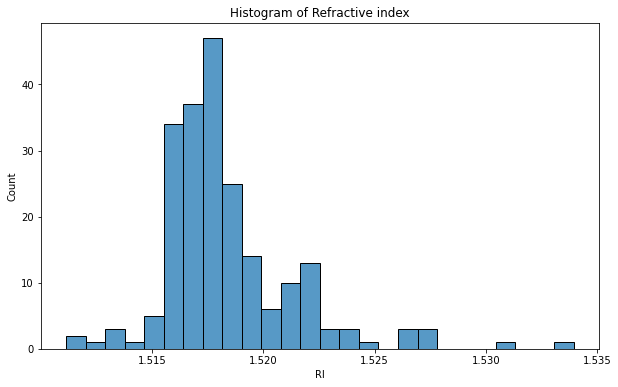

In [11]:
# Skewness and Kurtosis of the 'RI'
print('RI Skewness:',df1['RI'].skew())
print('RI Kurtosis :',df1['RI'].kurtosis())

# Box Plot of Refractive index
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['RI'])
plt.title('Box Plot of Refractive index')
plt.xlabel('RI')

plt.show()

# Histogram of Refractive index
plt.figure(figsize=(10, 6))
sns.histplot(df1['RI'])
plt.title('Histogram of Refractive index')
plt.xlabel('RI')

plt.show()

Na Skewness: 0.46569850922621137
Na Kurtosis : 3.083932979757714


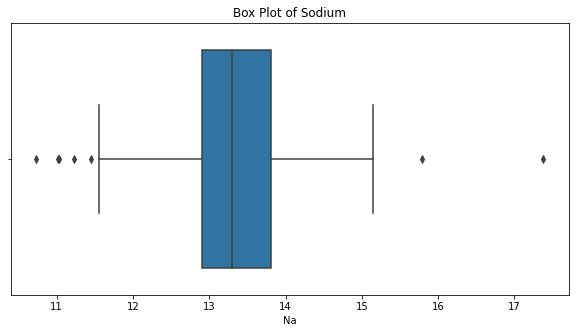

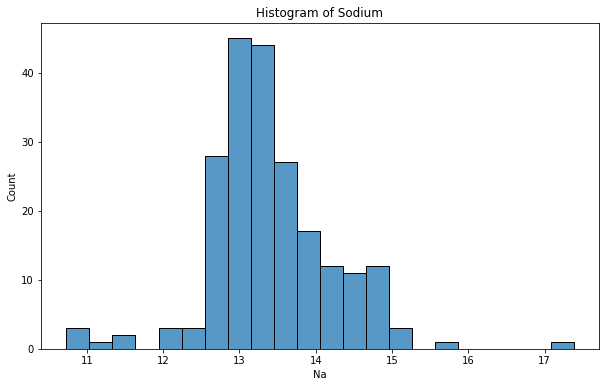

In [12]:
# Skewness and Kurtosis of the 'Na'
print('Na Skewness:',df1['Na'].skew())
print('Na Kurtosis :',df1['Na'].kurtosis())

# Box Plot of Sodium
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Na'])
plt.title('Box Plot of Sodium')
plt.xlabel('Na')

plt.show()

# Histogram of Sodium
plt.figure(figsize=(10, 6))
sns.histplot(df1['Na'])
plt.title('Histogram of Sodium')
plt.xlabel('Na')

plt.show()

- 'RI' column's distribution is right-skewed with heavier tails, indicating that there are more extreme values on the higher end of the distribution.

Mg Skewness: -1.1460958436967303
Mg Kurtosis : -0.42633823735256193


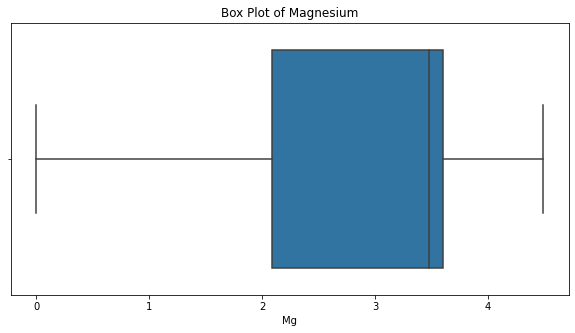

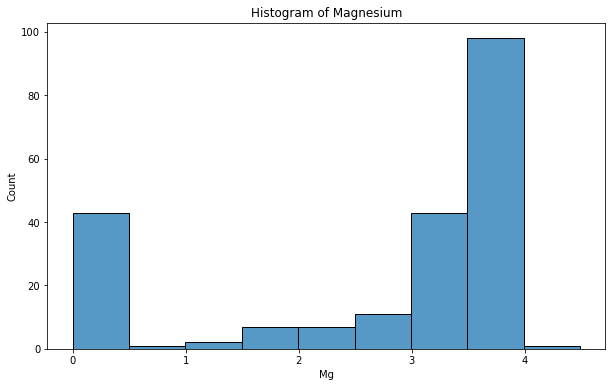

In [13]:
# Skewness and Kurtosis of the 'Mg'
print('Mg Skewness:',df1['Mg'].skew())
print('Mg Kurtosis :',df1['Mg'].kurtosis())

# Box Plot of Magnesium
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Mg'])
plt.title('Box Plot of Magnesium')
plt.xlabel('Mg')

plt.show()

# Histogram of Magnesium
plt.figure(figsize=(10, 6))
sns.histplot(df1['Mg'])
plt.title('Histogram of Magnesium')
plt.xlabel('Mg')

plt.show()

- 'Mg' column's distribution is left-skewed with lighter tails, indicating that there are more extreme values on the lower end of the distribution.

Al Skewness: 0.9384017147473468
Al Kurtosis : 2.1165631037885104


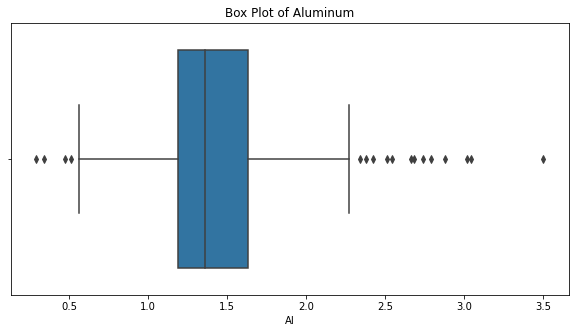

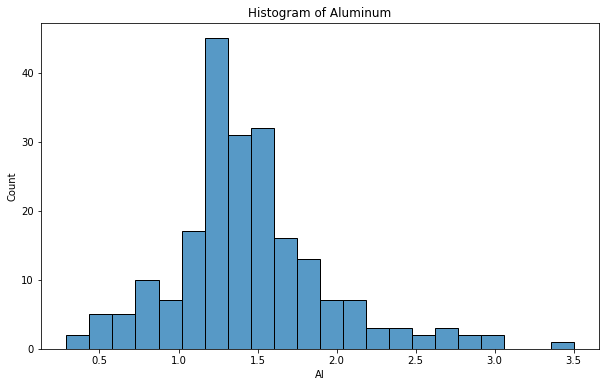

In [14]:
# Skewness and Kurtosis of the 'Al'
print('Al Skewness:',df1['Al'].skew())
print('Al Kurtosis :',df1['Al'].kurtosis())

# Box Plot of Aluminum
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Al'])
plt.title('Box Plot of Aluminum')
plt.xlabel('Al')

plt.show()

# Histogram of Aluminum
plt.figure(figsize=(10, 6))
sns.histplot(df1['Al'])
plt.title('Histogram of Aluminum')
plt.xlabel('Al')

plt.show()

- 'Al' column's distribution is right-skewed with heavier tails, indicating that there are more extreme values on the higher end of the distribution.

Si Skewness: -0.7446460155618705
Si Kurtosis : 3.0218640996737625


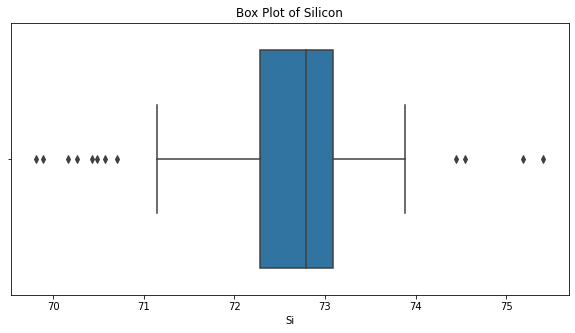

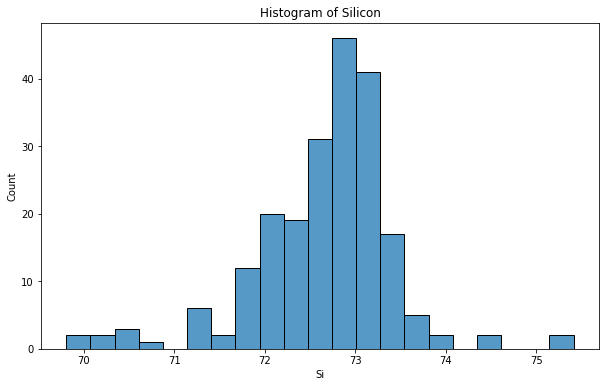

In [15]:
# Skewness and Kurtosis of the 'Si'
print('Si Skewness:',df1['Si'].skew())
print('Si Kurtosis :',df1['Si'].kurtosis())

# Box Plot of Silicon
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Si'])
plt.title('Box Plot of Silicon')
plt.xlabel('Si')

plt.show()

# Histogram of Silicon
plt.figure(figsize=(10, 6))
sns.histplot(df1['Si'])
plt.title('Histogram of Silicon')
plt.xlabel('Si')

plt.show()

- 'Si' column's distribution is left-skewed with heavier tails, indicating that there are more extreme values on the lower end of the distribution.

K Skewness: 6.545428649493799
K Kurtosis : 54.54264047609757


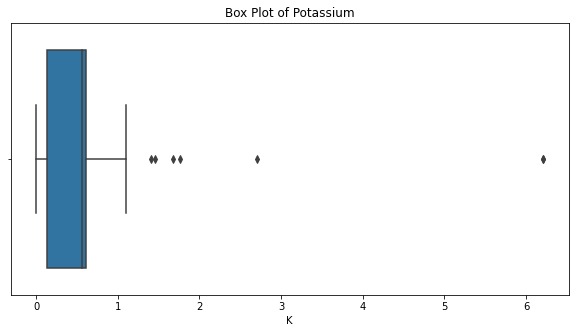

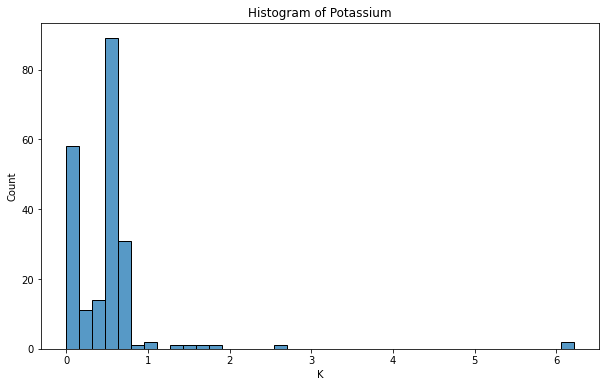

In [16]:
# Skewness and Kurtosis of the 'K'
print('K Skewness:',df1['K'].skew())
print('K Kurtosis :',df1['K'].kurtosis())

# Box Plot of Potassium
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['K'])
plt.title('Box Plot of Potassium')
plt.xlabel('K')

plt.show()

# Histogram of Potassium
plt.figure(figsize=(10, 6))
sns.histplot(df1['K'])
plt.title('Histogram of Potassium')
plt.xlabel('K')

plt.show()

- 'K' column's distribution is heavily right-skewed with extremely heavy tails, indicating that there are many extreme values on the higher end of the distribution.

Ca Skewness: 2.050752066632569
Ca Kurtosis : 6.6710540245855805


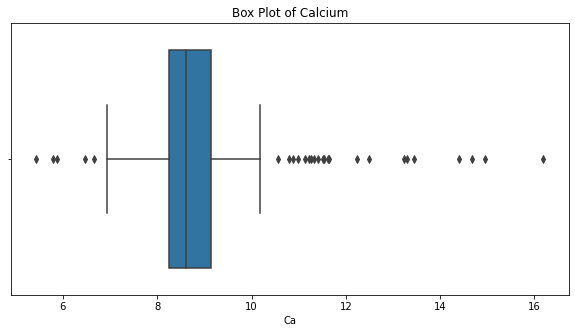

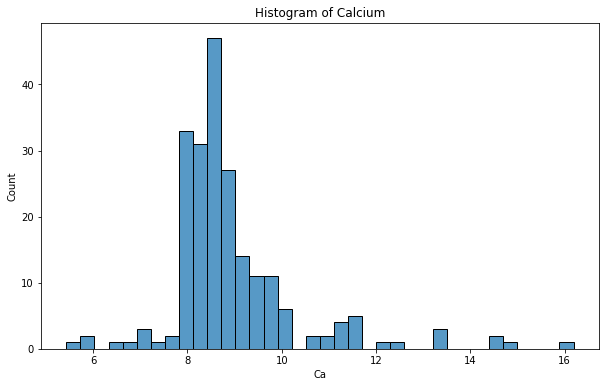

In [17]:
# Skewness and Kurtosis of the 'Ca'
print('Ca Skewness:',df1['Ca'].skew())
print('Ca Kurtosis :',df1['Ca'].kurtosis())

# Box Plot of Calcium
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Ca'])
plt.title('Box Plot of Calcium')
plt.xlabel('Ca')

plt.show()

# Histogram of Calcium
plt.figure(figsize=(10, 6))
sns.histplot(df1['Ca'])
plt.title('Histogram of Calcium')
plt.xlabel('Ca')

plt.show()

- 'Ca' column's distribution is heavily right-skewed with heavy tails, indicating that there are many extreme values on the higher end of the distribution. 

Ba Skewness: 3.406748836984873
Ba Kurtosis : 12.464935840160155


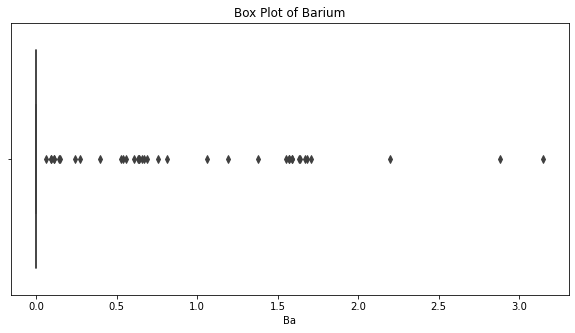

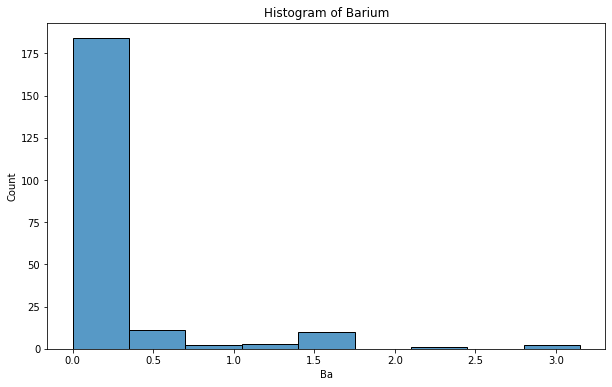

In [18]:
# Skewness and Kurtosis of the 'Ba'
print('Ba Skewness:',df1['Ba'].skew())
print('Ba Kurtosis :',df1['Ba'].kurtosis())

# Box Plot of Barium
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Ba'])
plt.title('Box Plot of Barium')
plt.xlabel('Ba')

plt.show()

# Histogram of Barium
plt.figure(figsize=(10, 6))
sns.histplot(df1['Ba'])
plt.title('Histogram of Barium')
plt.xlabel('Ba')

plt.show()

- 'Ba' column's distribution is heavily right-skewed with extremely heavy tails, indicating that there are many extreme values on the higher end of the distribution. 

Fe Skewness: 1.747173207250088
Fe Kurtosis : 2.6340227170108657


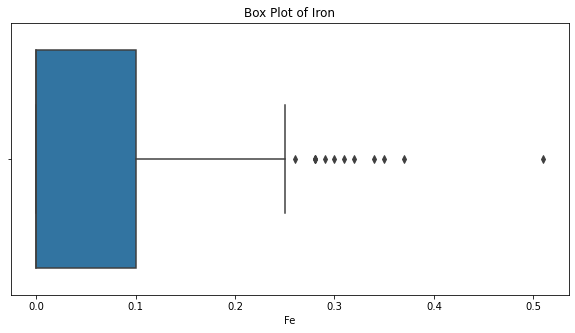

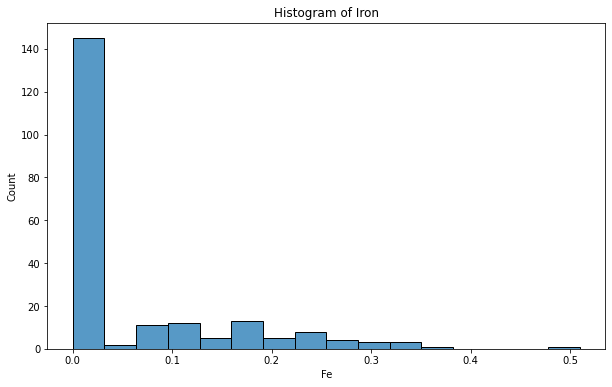

In [19]:
# Skewness and Kurtosis of the 'Fe'
print('Fe Skewness:',df1['Fe'].skew())
print('Fe Kurtosis :',df1['Fe'].kurtosis())

# Box Plot of Iron
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Fe'])
plt.title('Box Plot of Iron')
plt.xlabel('Fe')

plt.show()

# Histogram of Iron
plt.figure(figsize=(10, 6))
sns.histplot(df1['Fe'])
plt.title('Histogram of Iron')
plt.xlabel('Fe')

plt.show()

- 'Fe' column's distribution is right-skewed with heavier tails, indicating that there are more extreme values on the higher end of the distribution. 

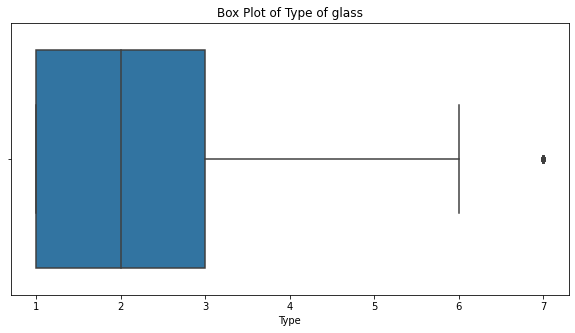

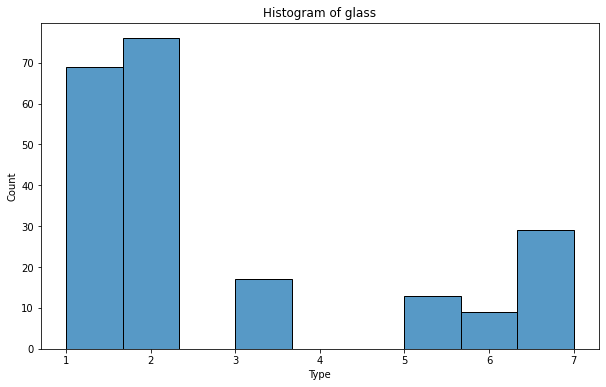

In [20]:
# Box Plot of Type of glass
plt.figure(figsize=(10, 5))
sns.boxplot(x=df1['Type'])
plt.title('Box Plot of Type of glass')
plt.xlabel('Type')

plt.show()

# Histogram of glass
plt.figure(figsize=(10, 6))
sns.histplot(df1['Type'])
plt.title('Histogram of glass')
plt.xlabel('Type')

plt.show()

In [21]:
# Percentages of each category in the 'Type'

type_counts = df1['Type'].value_counts()
total_samples = len(df1)

type_percentages = (type_counts / total_samples) * 100

print("Percentages of each category in the 'Type' column:")
print(type_percentages)


Percentages of each category in the 'Type' column:
2.0    35.680751
1.0    32.394366
7.0    13.615023
3.0     7.981221
5.0     6.103286
6.0     4.225352
Name: Type, dtype: float64


- Type 1.0: building_windows_float_processed (32.39%)
- Type 2.0: building_windows_non_float_processed (35.68%)
- Type 3.0: vehicle_windows_float_processed (7.98%)
- Type 5.0: containers (6.10%)
- Type 6.0: tableware (4.23%)
- Type 7.0: headlamps (13.62%)

These percentages indicate the distribution of different types of glass samples in your dataset. Type 2.0 and Type 1.0 are the most common types, comprising approximately 35.68% and 32.39% of the samples, respectively. The other types have smaller percentages of representation in the dataset.

## Correlation:

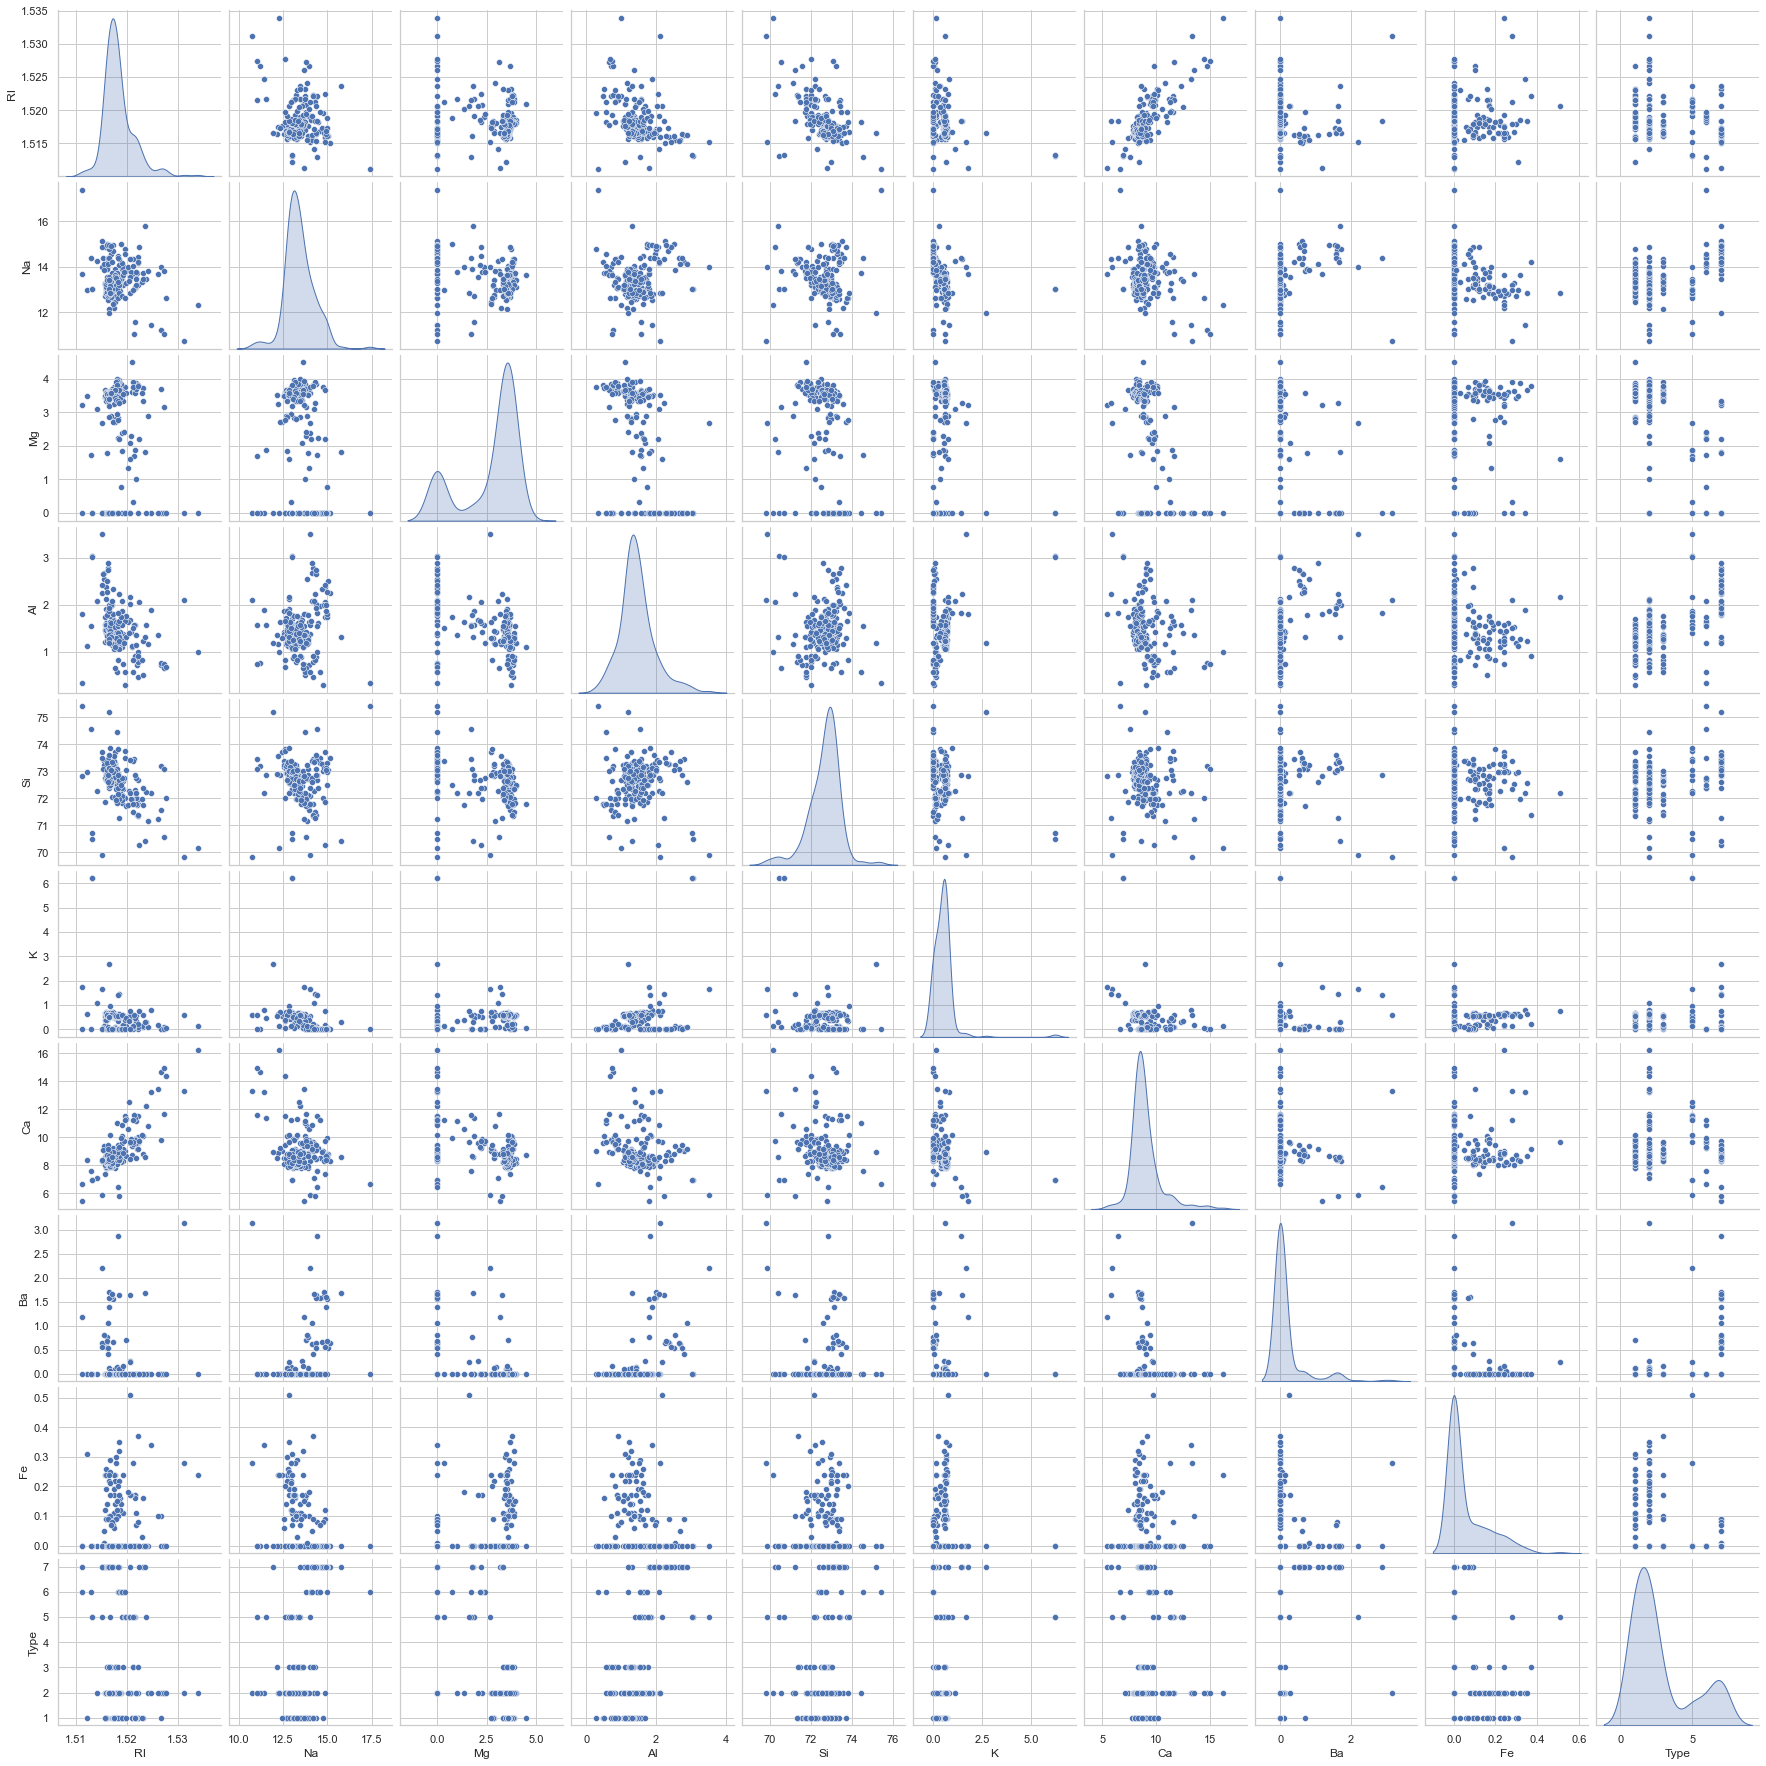

In [22]:
sns.set(style='whitegrid')
sns.pairplot(df1, diag_kind='kde', palette='husl')

plt.show()

In [23]:
cor_matrix =df1.corr()
cor_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


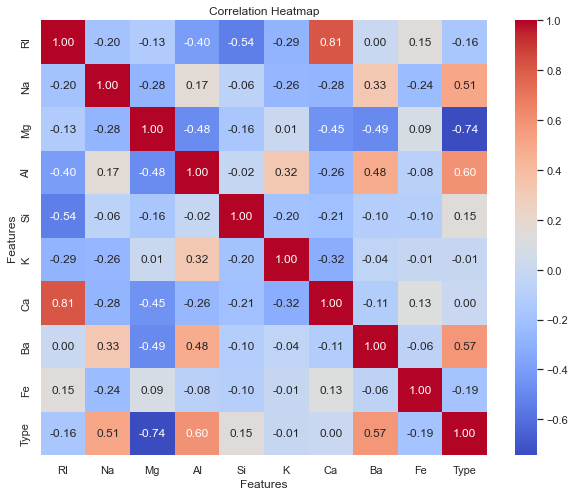

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

<h2>Correlation Inferences</h2>

<h3>Strong Positive Correlations:</h3>

<p>There is a strong positive correlation (0.81) between 'RI' (refractive index) and 'Ca' (Calcium). 'Na' (Sodium) also shows a moderate positive correlation (0.51) with the target variable 'Type'.</p>

<h3>Strong Negative Correlations:</h3>

<p>'Mg' (Magnesium) has a strong negative correlation (-0.74) with 'Type'. This suggests that as the amount of magnesium decreases, the type of glass tends to change. 'Si' (Silicon) also has a moderate negative correlation (-0.54) with 'Type'.</p>

<h3>Weak Correlations:</h3>

<p>'Ba' (Barium) and 'Fe' (Iron) have weak correlations with 'Type' (0.57 and -0.19 respectively). Other features like 'K' (Potassium) and 'Al' (Aluminum) show relatively weaker correlations with 'Type'.</p>

<h3>Correlation Among Features:</h3>

<p>There are some interesting correlations among the features themselves, such as a negative correlation between 'Si' and 'RI' (-0.54), and a positive correlation between 'Ca' and 'RI' (0.81).</p>

<h3>Direction of Correlation:</h3>

<p>Positive correlations indicate that as one variable increases, the other tends to increase as well, and vice versa for negative correlations.</p>

<h3>Magnitude of Correlation:</h3>

<p>The magnitude of the correlation coefficient indicates the strength of the relationship between variables. Higher absolute values suggest stronger relationships.</p>



# 3. Data Preprocessing:

### - Standardizing Data (Excluding 'Type' Column) :

In [25]:
df2 = df1.copy()

In [26]:
num_columns = df2.select_dtypes(include=['float64', 'int64']).columns.drop('Type')

In [27]:
scaler = StandardScaler()
df2[num_columns] = scaler.fit_transform(df2[num_columns])

In [28]:
df2.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301,7.0
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301,7.0
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301,7.0
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301,7.0
212,-0.409059,1.013713,-1.860172,1.274389,0.912909,-0.765554,-0.234852,3.005854,-0.588301,7.0


# 4. Random Forest Model Implementation:

In [29]:
X = df2.iloc[:,0:9]

In [30]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [31]:
y = df2.iloc[:,9]

In [32]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
208    7.0
209    7.0
210    7.0
211    7.0
212    7.0
Name: Type, Length: 213, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(170, 9)

In [35]:
y_test.shape

(43,)

### Model Building

In [36]:
rf_clf = RandomForestClassifier(random_state=42)

In [37]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
fn = ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
cn = ['1', '2', '3', '4', '5', '6', '7'] 

In [39]:
num_trees = rf_clf.n_estimators
num_trees

100

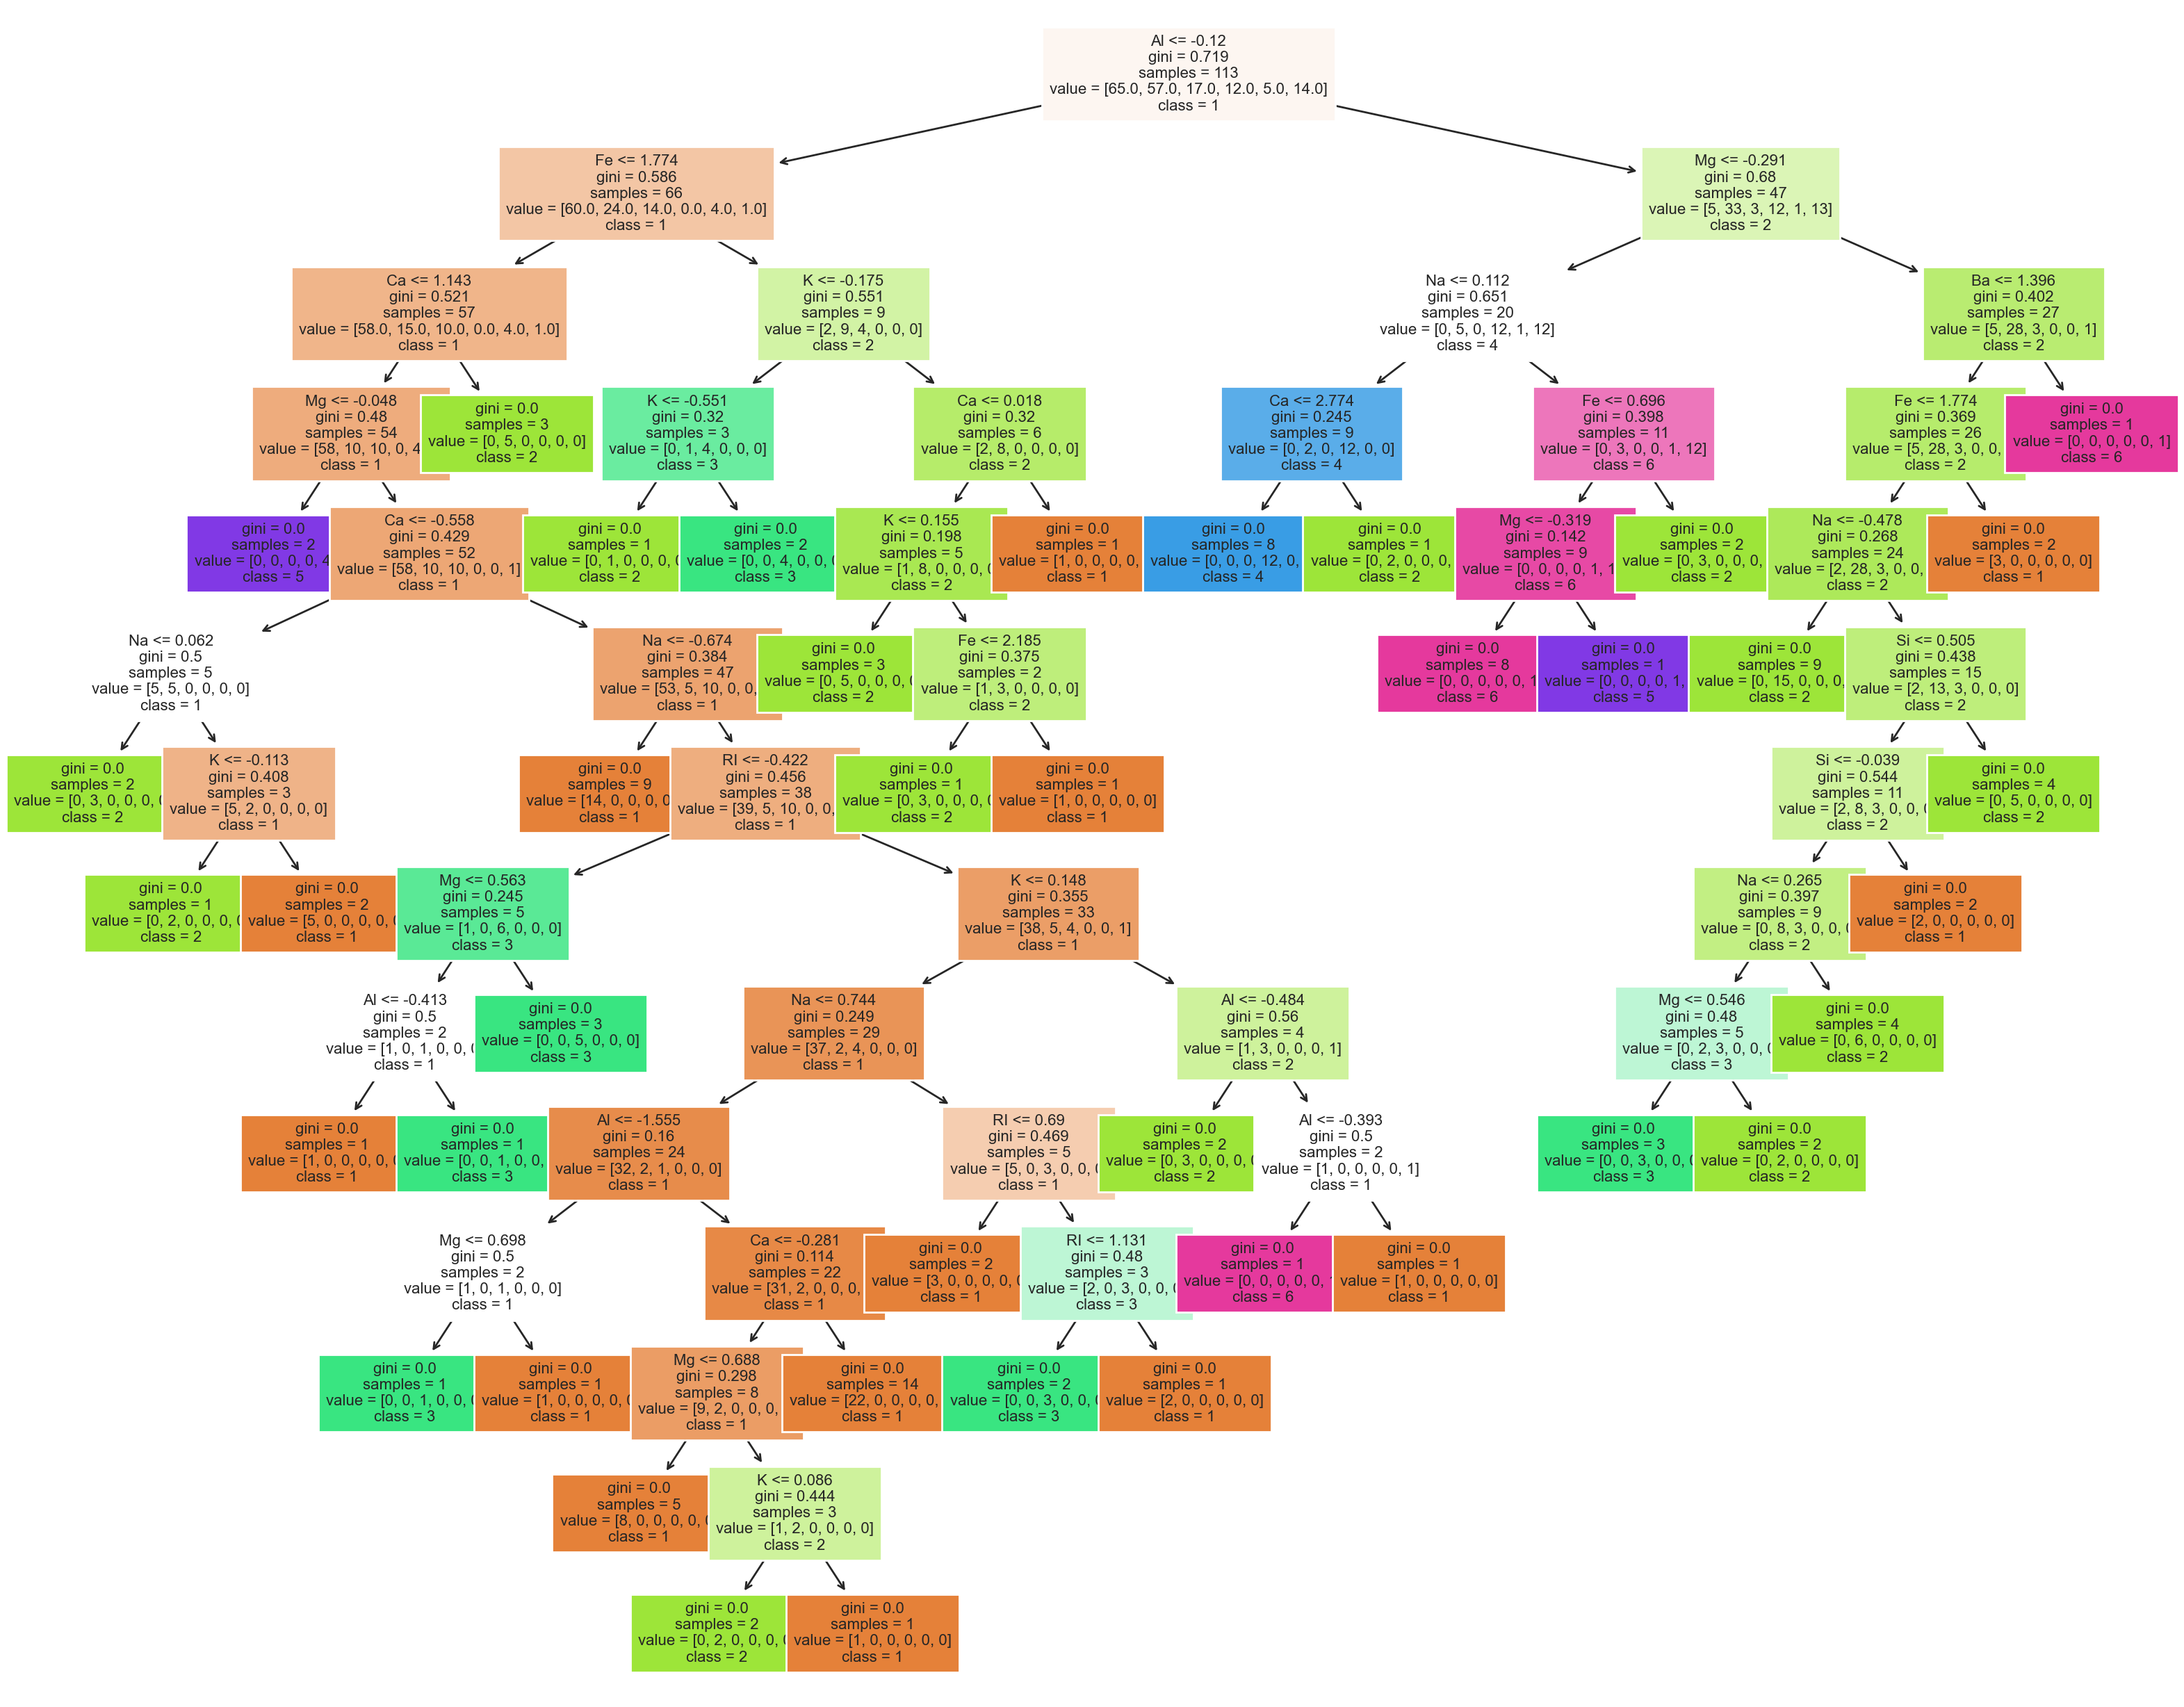

In [40]:
single_tree = rf_clf.estimators_[0]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 16), dpi=200)
plot_tree(single_tree, feature_names=fn, class_names=cn, filled=True, fontsize=8, ax=axes)
plt.show()

In [41]:
rf_clf.feature_importances_

array([0.14119724, 0.12514658, 0.15918604, 0.14414791, 0.08666427,
       0.0811297 , 0.14032274, 0.07714116, 0.04506435])

In [42]:
feature_imp = pd.Series(rf_clf.feature_importances_, index=fn).sort_values(ascending=False)

In [43]:
feature_imp

Mg    0.159186
Al    0.144148
RI    0.141197
Ca    0.140323
Na    0.125147
Si    0.086664
K     0.081130
Ba    0.077141
Fe    0.045064
dtype: float64

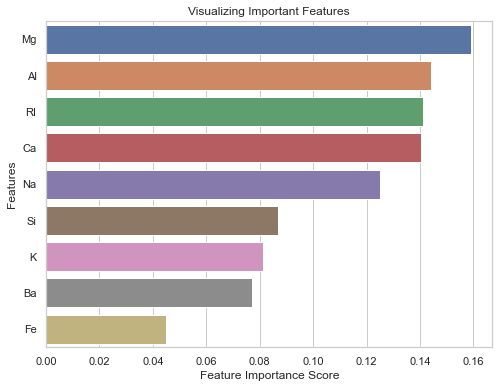

In [44]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

### Predicting on test data:

In [45]:
y_pred = rf_clf.predict(X_test)

In [46]:
pd.crosstab(y_test,y_pred)

col_0,1.0,2.0,3.0,5.0,6.0,7.0
Type,,,,,,
1.0,10,0,0,0,0,0
2.0,4,10,0,1,0,0
3.0,0,1,2,0,0,0
5.0,0,2,0,1,0,0
6.0,0,1,0,0,2,0
7.0,0,1,0,0,0,8


### Evaluating the performance of a classifier

In [47]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         1.0       0.71      1.00      0.83        10
         2.0       0.67      0.67      0.67        15
         3.0       1.00      0.67      0.80         3
         5.0       0.50      0.33      0.40         3
         6.0       1.00      0.67      0.80         3
         7.0       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.81      0.70      0.74        43
weighted avg       0.78      0.77      0.76        43



In [48]:
rf_accuracy=np.mean(y_pred==y_test)
rf_accuracy

0.7674418604651163

# 5. Bagging and Boosting Methods:

### 1. BaggingClassifier with a Random Forest base estimator

In [49]:
bag_clf = BaggingClassifier(rf_clf, n_estimators=num_trees, random_state=42)

In [50]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [51]:
bag_y_pred = bag_clf.predict(X_test)

In [52]:
bag_accuracy=np.mean(bag_y_pred==y_test)
bag_accuracy

0.7906976744186046

### 2. AdaBoostClassifier on the Random Forest classifier

In [53]:
ada_clf = AdaBoostClassifier(n_estimators=num_trees, random_state=42, algorithm='SAMME')

In [54]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=42)

In [55]:
ada_y_pred = ada_clf.predict(X_test)

In [56]:
ada_accuracy= np.mean(ada_y_pred==y_test)
ada_accuracy

0.7674418604651163

### Comparing the results:

In [57]:
print("Accuracy for Random Forest Classifier:", rf_accuracy)
print("Accuracy for BaggingClassifier with Random Forest base estimator:", bag_accuracy)
print("Accuracy for AdaBoostClassifier with default base estimator:", ada_accuracy)

Accuracy for Random Forest Classifier: 0.7674418604651163
Accuracy for BaggingClassifier with Random Forest base estimator: 0.7906976744186046
Accuracy for AdaBoostClassifier with default base estimator: 0.7674418604651163


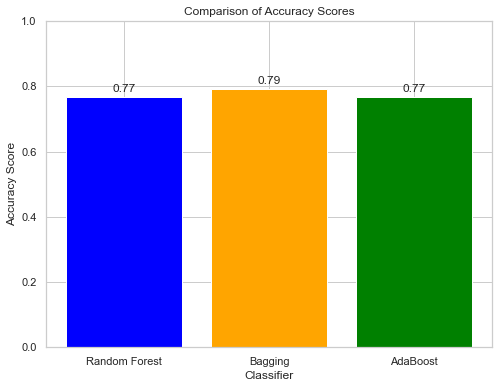

In [58]:
# plot
accuracy_scores = [rf_accuracy, bag_accuracy, ada_accuracy]
classifiers = ['Random Forest', 'Bagging', 'AdaBoost']

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracy_scores, color=['blue', 'orange', 'green'])

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.01, 
             f'{score:.2f}', 
             ha='center', 
             va='bottom')

plt.title('Comparison of Accuracy Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0.0, 1.0) 
plt.show()

# -- END --